In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# color dict (use: colors['XColor'])
import ast
with open('color_palette.txt', 'r') as file:
    contents = file.read()
    colors = ast.literal_eval(contents)

In [4]:
rdrive = '/mnt/researchdrive/BOX_INTERNAL/opotowsky/processed_results/'
abs_dir = rdrive + 'abserr/'
rel_dir = rdrive + 'relerr/'

In [5]:
# uncertainty for both MLL and Scikit are now sqrt(counts), but implemented differently (std dev versus rand err method in scikit)
# nuc and act trainsets use flat 5% unc/rand err
# 6.7% of the train set is reserved as test set (randomly in each case, but also implemented differently)

In [13]:
dropme = ['nuc29', 'act32', 'act7/12']
dets = ['d1_hpge', 'd2_hpge', 'd3_czt', 'd6_sri2', 'd5_labr3', 'd4_nai']
preds = ['burnup', 'enrichment', 'cooling']
predmll = ['Burnup', 'Enrichment', 'CoolingTime']

In [8]:
pred = 'burnup'
enlist = 'auto'

In [10]:
df = pd.read_pickle(abs_dir + pred + '_' + 'abserr_mll_scikit_compare_' + enlist  + '.pkl')

In [14]:
df_sub = df.drop(dropme, axis=1)
df_sub.head(1)

/home/opotowsky/.local/lib/python3.6/site-packages/pandas/core/generic.py:3878: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Detector   d1_hpge                         d2_hpge                         \
Algorithm knn_auto    dtree_auto mll_auto knn_auto    dtree_auto mll_auto   
0            33.95  2.046363e-12    33.95    33.95  2.273737e-12    33.95   

Detector    d3_czt                         d6_sri2                      \
Algorithm knn_auto    dtree_auto mll_auto knn_auto dtree_auto mll_auto   
0            33.95  1.591616e-12    33.95    33.95      33.95    33.95   

Detector  d5_labr3                       d4_nai                      
Algorithm knn_auto dtree_auto mll_auto knn_auto dtree_auto mll_auto  
0            33.95        0.0    33.95    33.95     276.49    33.95

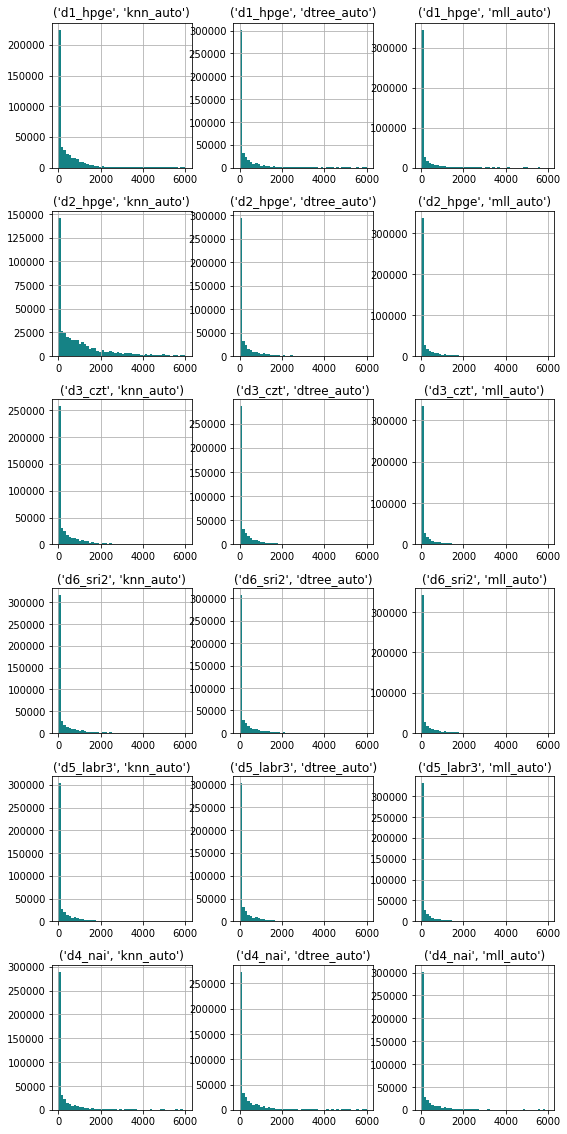

In [16]:
df_sub.hist(layout=(6, 3), bins=50, color=colors['MTeal'], range=(0,6000), figsize=(9, 20))
plt.show()

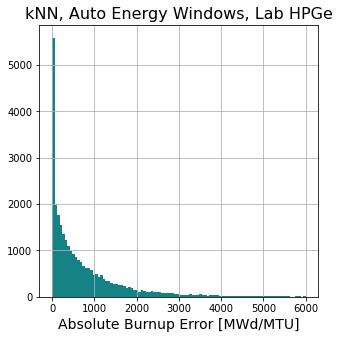

In [104]:
#fig, ax = plt.subplots(111)
df.hist(column=('knn', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
plt.xlabel('Absolute Burnup Error [MWd/MTU]', fontsize=14)
plt.title('kNN, Auto Energy Windows, Lab HPGe', fontsize=16)
#df.hist(column=('dtree', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
#df.hist(column=('mll', 'd1_hpge'), bins=100, color=colors['MTeal'], range=(0,6000), figsize=(5,5))
plt.savefig('./plots/abs_err_hist.png', bbox_inches='tight', transparent=True)